In [404]:
#pip install --upgrade google-cloud-talent
#pip install --upgrade google-api-python-client


In [426]:
%matplotlib inline

#Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import gmaps
#import gmaps.datasets
import folium
import requests
import json
from config import api_key

In [444]:
#Get data from the USAJobs Rest API
url = "https://data.usajobs.gov/api/Search"

querystring={"PositionTitle":"Data","ResultsPerPage":"250"}
headers = {
    'authorization-key': api_key,
    'user-agent': 'marthafeldtmann@gmail.com',
    'host': "data.usajobs.gov",
    'cache-control': "no-cache",
}

print(response)
response = requests.request("GET", url, headers=headers, params=querystring)
response=response.json()
print("Total jobs:", response['SearchResult']['SearchResultCount'])
with open("usajobs_data_file.json","w") as write_file:
    json_string = json.dumps(response)

#create empty list to be used to store data retrieved
title=[]
location=[]
organization=[]
category=[]
grade=[]
qualification=[]
salary=[]
requirements=[]
evaluations=[]
num_jobs = len(response["SearchResult"]["SearchResultItems"])
print(num_jobs)
#start the data retrieval
start = f"{'='*20}Start of Data Retrieval{'='*20}"
end = f"{'='*20}End of Data Retrieval{'='*20}"
print(start)
j=1
for i in response["SearchResult"]["SearchResultItems"]:
    try:
        print(f"Processing record {j} of {num_jobs}: {i}")
        j+=1
        response = requests.request("GET", url, headers=headers, params=querystring)
        title.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionTitle"])
        location.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionLocation"])
        organization.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["OrganizationName"])
        category.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["JobCategory"])
        grade.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["JobGrade"])
        qualification.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["QualificationSummary"])
        salary.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionRemuniration"])
        requirements.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["UserArea"]["Requirements"])
        evaluations.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["UserArea"]["Evaluations"])
        
        time.sleep(1.00)
    except:
        print(f"Missing results for {i}. Skip record")



{'LanguageCode': 'EN', 'SearchParameters': {}, 'SearchResult': {'SearchResultCount': 0, 'SearchResultCountAll': 22, 'SearchResultItems': [], 'UserArea': {'NumberOfPages': '3', 'IsRadialSearch': False}}}
Total jobs: 22
22
====================Start of Data Retrieval====================
Processing record 1 of 22: {'MatchedObjectId': '547168700', 'MatchedObjectDescriptor': {'PositionID': 'CIV-19-DEU-8', 'PositionTitle': 'Data Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547168700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547168700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Depart

Missing results for {'MatchedObjectId': '548017700', 'MatchedObjectDescriptor': {'PositionID': '20200011', 'PositionTitle': 'Data Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548017700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548017700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Multiple Locations', 'PositionLocation': [{'LocationName': 'Saint Louis, Missouri', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Missouri', 'CityName': 'Saint Louis, Missouri', 'Longitude': -90.19952, 'Latitude': 38.62774}, {'LocationName': 'Springfield, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Springfield, Virginia', 'Longitude': -77.1917, 'Latitude': 38.779}], 'OrganizationName': 'National Geospatial-Intelligence Agency', 'DepartmentName': 'Department of Defense', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'IA'}], 'Position

Missing results for {'MatchedObjectId': '548017800', 'MatchedObjectDescriptor': {'PositionID': '20200012', 'PositionTitle': 'Data Engineer', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548017800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548017800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Multiple Locations', 'PositionLocation': [{'LocationName': 'Saint Louis, Missouri', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Missouri', 'CityName': 'Saint Louis, Missouri', 'Longitude': -90.19952, 'Latitude': 38.62774}, {'LocationName': 'Springfield, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Springfield, Virginia', 'Longitude': -77.1917, 'Latitude': 38.779}], 'OrganizationName': 'National Geospatial-Intelligence Agency', 'DepartmentName': 'Department of Defense', 'JobCategory': [{'Name': 'Information Technology Management', 'Code': '2210'}], 'JobGrade': [{'Code': 'IA'}], 'Position

Missing results for {'MatchedObjectId': '547735100', 'MatchedObjectDescriptor': {'PositionID': 'OCIO-19-10614853-MP', 'PositionTitle': 'Data Scientist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547735100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547735100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'District of Columbia, District of Columbia', 'PositionLocation': [{'LocationName': 'District of Columbia, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'District of Columbia, District of Columbia', 'Longitude': -77.03196, 'Latitude': 38.89037}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Office of the Chief Information Officer', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'Positi

Missing results for {'MatchedObjectId': '547735800', 'MatchedObjectDescriptor': {'PositionID': 'OCIO-19-10614854-DE', 'PositionTitle': 'Data Scientist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547735800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547735800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'District of Columbia, District of Columbia', 'PositionLocation': [{'LocationName': 'District of Columbia, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'District of Columbia, District of Columbia', 'Longitude': -77.03196, 'Latitude': 38.89037}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Office of the Chief Information Officer', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'Positi

Missing results for {'MatchedObjectId': '547597400', 'MatchedObjectDescriptor': {'PositionID': 'WTEV199903406488', 'PositionTitle': 'Data Quality Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547597400', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547597400?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fort Wainwright, Alaska', 'PositionLocation': [{'LocationName': 'Fort Wainwright, Alaska', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Alaska', 'CityName': 'Fort Wainwright, Alaska', 'Longitude': -147.60257, 'Latitude': 64.8417053}], 'OrganizationName': 'U.S. Army Medical Command', 'DepartmentName': 'Department of the Army', 'SubAgency': 'PATIENT ADMINISTRATION DIVISION, MEDDAC-AK', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 

Missing results for {'MatchedObjectId': '544865400', 'MatchedObjectDescriptor': {'PositionID': 'VAR001004', 'PositionTitle': 'Data Services Librarian', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/544865400', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/544865400?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Library of Congress', 'DepartmentName': 'Legislative Branch', 'JobCategory': [{'Name': 'Librarian', 'Code': '1410'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Compflex or Flextime', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Position', 'Code': '15317'}], 'QualificationSummary': 'Applicants must have had progressi

Missing results for {'MatchedObjectId': '547302200', 'MatchedObjectDescriptor': {'PositionID': 'NCBF197492135842R', 'PositionTitle': 'DATA ENTRY TECHNICIAN (OA)', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547302200', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547302200?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fort Meade, Maryland', 'PositionLocation': [{'LocationName': 'Fort Meade, Maryland', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Maryland', 'CityName': 'Fort Meade, Maryland', 'Longitude': -76.7419, 'Latitude': 39.1014}], 'OrganizationName': 'U.S. Army Medical Command', 'DepartmentName': 'Department of the Army', 'SubAgency': 'Forensic Toxicology Drug Testing Lab', 'JobCategory': [{'Name': 'Miscellaneous Clerk And Assistant', 'Code': '0303'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSumm

Missing results for {'MatchedObjectId': '546602800', 'MatchedObjectDescriptor': {'PositionID': 'DE-10612557-19-ZLR', 'PositionTitle': 'DATA MANAGEMENT SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546602800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546602800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Naval Station Complex, San Diego, California', 'PositionLocation': [{'LocationName': 'Naval Station Complex, San Diego, California', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'California', 'CityName': 'Naval Station Complex, San Diego, California', 'Longitude': -117.12442, 'Latitude': 32.6757}], 'OrganizationName': 'U.S. Pacific Fleet, Commander in Chief', 'DepartmentName': 'Department of the Navy', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Perma

Missing results for {'MatchedObjectId': '547911500', 'MatchedObjectDescriptor': {'PositionID': 'FEMA-20-ZMM-324781-CORE', 'PositionTitle': 'Data Management Specialist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547911500', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547911500?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Atlanta, Georgia', 'PositionLocation': [{'LocationName': 'Atlanta, Georgia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Georgia', 'CityName': 'Atlanta, Georgia', 'Longitude': -84.39111, 'Latitude': 33.7483139}], 'OrganizationName': 'Federal Emergency Management Agency', 'DepartmentName': 'Department of Homeland Security', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'IC'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Term', 'Code': '15319'}], 'QualificationSummary': "The qualification requiremen

Missing results for {'MatchedObjectId': '546843600', 'MatchedObjectDescriptor': {'PositionID': 'VAR001011', 'PositionTitle': 'Legislative Data Specialist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546843600', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546843600?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Library of Congress', 'DepartmentName': 'Legislative Branch', 'JobCategory': [{'Name': 'Librarian', 'Code': '1410'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Flextime, Compflex', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Position', 'Code': '15317'}], 'QualificationSummary': 'Applicants must have had progres

Missing results for {'MatchedObjectId': '547944800', 'MatchedObjectDescriptor': {'PositionID': '9R-10605849-697331-JJB', 'PositionTitle': 'TECHNICAL DATA MANAGEMENT SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547944800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547944800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Robins AFB, Georgia', 'PositionLocation': [{'LocationName': 'Robins AFB, Georgia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Georgia', 'CityName': 'Robins AFB, Georgia', 'Longitude': -83.5919, 'Latitude': 32.64}], 'OrganizationName': 'Air Force Materiel Command', 'DepartmentName': 'Department of the Air Force', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': 'SPECIALIZED EXPERIENCE: 

Missing results for {'MatchedObjectId': '545818300', 'MatchedObjectDescriptor': {'PositionID': '19-FRD-JC-072', 'PositionTitle': 'Data Analyst (Health Care Fraud) - Direct Hire', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/545818300', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/545818300?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Criminal Division', 'JobCategory': [{'Name': 'Social Science', 'Code': '0101'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '

Missing results for {'MatchedObjectId': '547922800', 'MatchedObjectDescriptor': {'PositionID': 'CBBM-10623686-19-ER', 'PositionTitle': 'RN Minimum Data Set Resident Assessment Coordinator', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547922800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547922800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Dublin, Georgia', 'PositionLocation': [{'LocationName': 'Dublin, Georgia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Georgia', 'CityName': 'Dublin, Georgia', 'Longitude': -82.96025, 'Latitude': 32.50885}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'JobCategory': [{'Name': 'Nurse', 'Code': '0610'}], 'JobGrade': [{'Code': 'VN'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': "To qualify for this position, 

Missing results for {'MatchedObjectId': '546223000', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0550', 'PositionTitle': 'Data Entry Clerk, GG-1531-04, DOBE-MP-DEU-External-*AMENDED', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546223000', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546223000?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Jeffersonville, Indiana', 'PositionLocation': [{'LocationName': 'Jeffersonville, Indiana', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Indiana', 'CityName': 'Jeffersonville, Indiana', 'Longitude': -85.73747, 'Latitude': 38.27913}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'GG'}], 'PositionSchedule': [{'Name': 'Competitive Service: Temporary Appointment not to exceed 08/29/2020. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full T

Missing results for {'MatchedObjectId': '547343900', 'MatchedObjectDescriptor': {'PositionID': 'CAZM-10618153-20-JD', 'PositionTitle': 'Management and Program Analyst (VISN Data Scientist)', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547343900', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547343900?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'San Antonio, Texas', 'PositionLocation': [{'LocationName': 'San Antonio, Texas', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Texas', 'CityName': 'San Antonio, Texas', 'Longitude': -98.49462, 'Latitude': 29.42449}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'SubAgency': 'VISN 17 VA Heart of Texas Health Care Network', 'JobCategory': [{'Name': 'Management And Program Analysis', 'Code': '0343'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [

Missing results for {'MatchedObjectId': '546218700', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0549', 'PositionTitle': 'Data Entry Clerk, Day Shift, AD-1531, Phoenix-JD-DEU-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546218700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546218700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Phoenix, Arizona', 'PositionLocation': [{'LocationName': 'Phoenix, Arizona', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Arizona', 'CityName': 'Phoenix, Arizona', 'Longitude': -112.075775, 'Latitude': 33.44826}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'AD'}], 'PositionSchedule': [{'Name': 'Excepted Service, Temporary NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full Time', 'Code': '15318'}], 'QualificationSummar

Missing results for {'MatchedObjectId': '546145200', 'MatchedObjectDescriptor': {'PositionID': 'CBDG-10602590-19-TL', 'PositionTitle': 'Health System Specialist (Quality Data Health System Specialist)', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546145200', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546145200?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Gainesville, Florida', 'PositionLocation': [{'LocationName': 'Gainesville, Florida', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Florida', 'CityName': 'Gainesville, Florida', 'Longitude': -82.32319, 'Latitude': 29.65195}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'SubAgency': 'VHA North Florida South Georgia Gainesville', 'JobCategory': [{'Name': 'Health System Specialist', 'Code': '0671'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOffer

Missing results for {'MatchedObjectId': '546223100', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0551', 'PositionTitle': 'Data Entry Clerk, Evening/Night Shift, AD-1531, Phoenix-JD-DEU-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546223100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546223100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Phoenix, Arizona', 'PositionLocation': [{'LocationName': 'Phoenix, Arizona', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Arizona', 'CityName': 'Phoenix, Arizona', 'Longitude': -112.075775, 'Latitude': 33.44826}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'AD'}], 'PositionSchedule': [{'Name': 'Excepted Service, Temporary NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full Time', 'Code': '15318'}], 'Qualifica

Missing results for {'MatchedObjectId': '546557500', 'MatchedObjectDescriptor': {'PositionID': 'HRSA-MCHB-19-DE-10611710', 'PositionTitle': 'Health Scientist - Maternal and Child Health Data Subject Matter Expert', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546557500', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546557500?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Rockville, Maryland', 'PositionLocation': [{'LocationName': 'Rockville, Maryland', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Maryland', 'CityName': 'Rockville, Maryland', 'Longitude': -77.1512, 'Latitude': 39.0817}], 'OrganizationName': 'Health Resources and Services Administration', 'DepartmentName': 'Department of Health And Human Services', 'SubAgency': 'Maternal and Child Health Bureau/Division of State and Community Health', 'JobCategory': [{'Name': 'General Health Science', 'Code': '0601'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Fu

Missing results for {'MatchedObjectId': '546558000', 'MatchedObjectDescriptor': {'PositionID': 'HRSA-MCHB-19-MP-10611711', 'PositionTitle': 'Health Scientist - Maternal and Child Health Data Subject Matter Expert', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546558000', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546558000?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Rockville, Maryland', 'PositionLocation': [{'LocationName': 'Rockville, Maryland', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Maryland', 'CityName': 'Rockville, Maryland', 'Longitude': -77.1512, 'Latitude': 39.0817}], 'OrganizationName': 'Health Resources and Services Administration', 'DepartmentName': 'Department of Health And Human Services', 'SubAgency': 'Maternal and Child Health Bureau/Division of State and Community Health', 'JobCategory': [{'Name': 'General Health Science', 'Code': '0601'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Fu

In [445]:
#organize the data in a dictionary to write to csv file
job_dict={ "Title":title,
          "Location":location,
          "Organization":organization,
          "Category":category,
          "Grade":grade,
          "Qualification":qualification,
          "Salary":salary,
          "Requirements":requirements,
          "Evaluations":evaluations}
#add the data to a dataframe
job_data_df=pd.DataFrame(job_dict)
job_data_df

,Title,Location,Organization,Category,Grade,Qualification,Salary,Requirements,Evaluations


In [390]:
indeed_data = pd.read_csv('./resources/01_indeed_job_dataset.csv')
indeed_data.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [391]:
indeed_data['Company_Industry']

0                            Health Care
1                                    NaN
2                                    NaN
3                             Government
4           Banks and Financial Services
5                                    NaN
6                             Government
7                                    NaN
8                  Education and Schools
9                             Government
10                 Education and Schools
11                 Education and Schools
12                 Education and Schools
13                                   NaN
14      Consulting and Business Services
15                 Education and Schools
16                                   NaN
17      Consulting and Business Services
18                  Energy and Utilities
19                 Education and Schools
20                           Health Care
21                 Aerospace and Defense
22                 Aerospace and Defense
23                            Government
24      Consulti

In [392]:
indeed_data.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [393]:
indeed_location= indeed_data[['Job_Type','Location']]
indeed_location.head()

,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [394]:
#replace the blank values with Unknows
indeed_location.replace(np.NaN, 'Any', inplace=True)
indeed_location.head()

,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [395]:
#remove all "Any" entries from the set
indeed_location.drop(indeed_location.index[indeed_location['Location'] == 'Any'], inplace = True)
indeed_location.head()

,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [396]:
#Group the dataset by Job Type and State
perc_values = indeed_location.groupby('Location', as_index=False)['Job_Type'].count()
total_jobs = len(indeed_location)
#print(total_jobs)
perc_values['Job_Type'] = perc_values['Job_Type'].astype(int)
perc_values['perc']= 100*(perc_values['Job_Type']/total_jobs)
#perc_values['perc'] = perc_values['perc'].map(lambda n: '{:.2%}'.format(n))
#perc_values=perc_values.sort_values('perc').reset_index(drop=True)
perc_values

,Location,Job_Type,perc
0,AL,17,0.311184
1,AR,28,0.512539
2,AZ,53,0.970163
3,CA,1395,25.535420
4,CO,109,1.995241
5,CT,75,1.372872
6,DC,140,2.562694
7,DE,17,0.311184
8,FL,103,1.885411
9,GA,139,2.544390


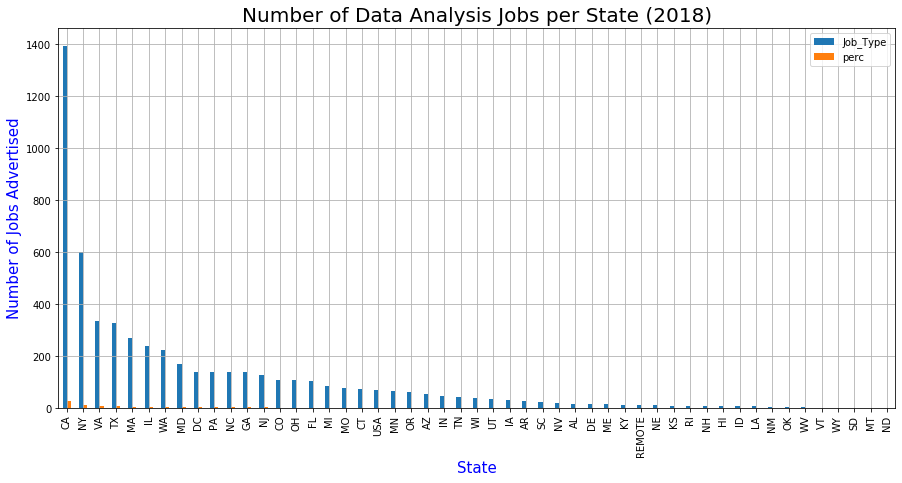

In [397]:
#create bar graph to illustrate number of Data Analysis jobs per state
fig, ax = plt.subplots(figsize=(15,7))
#grouped_df = indeed_location.groupby('Location', as_index=False)['Job_Type'].count()
grouped_df=perc_values.sort_values('Job_Type', ascending = False).reset_index(drop=True)
grouped_df.plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='State', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
ax.set_xticklabels(grouped_df.Location)
plt.grid()
plt.show()


In [398]:
#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
state_map = folium.Map(location=[37, -102], zoom_start=5)
#Add the color for the chloropleth

bins = [0, 1, 2, 4, 6, 12, 26]

state_map.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=perc_values,
    columns=['Location','perc'],
    #key_on='feature.id',
    key_on='feature.id',
    fill_color='Spectral',
    fill_opacity=1.0,
    line_opacity=0.2,
    nan_fill_color = 'white',
    bins=bins,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(state_map)
state_map.save("./Images/_map.html")
state_map



/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [399]:
indeed_industry= indeed_data[['Company_Industry','No_of_Reviews']]
indeed_industry.head()

,Company_Industry,No_of_Reviews
0,Health Care,3301.0
1,NaN,NaN
2,NaN,62.0
3,Government,158.0
4,Banks and Financial Services,495.0


In [400]:
#cleanup data
indeed_industry.replace(np.NaN, 'Unkown', inplace=True)
indeed_industry.drop(indeed_industry.index[indeed_industry['Company_Industry'] == 'Unkown'], inplace = True)
indeed_industry.drop(indeed_industry.index[indeed_industry['No_of_Reviews'] == 'Unkown'], inplace = True)
indeed_industry

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Company_Industry,No_of_Reviews
0,Health Care,3301
3,Government,158
4,Banks and Financial Services,495
6,Government,30
8,Education and Schools,233
9,Government,4227
10,Education and Schools,541
11,Education and Schools,541
12,Education and Schools,150
14,Consulting and Business Services,81


In [401]:
#Group the dataset by Industry
industry = indeed_industry.groupby('Company_Industry', as_index=False)['No_of_Reviews'].sum()
total_industries = indeed_industry['No_of_Reviews'].sum()

industry['No_of_Reviews'] = industry['No_of_Reviews'].astype(int)
industry['perc']= 100*(industry['No_of_Reviews']/total_industries)
industry

,Company_Industry,No_of_Reviews,perc
0,Aerospace and Defense,260331,1.324353
1,Agriculture and Extraction,24227,0.123247
2,Auto,88721,0.451340
3,Banks and Financial Services,2695127,13.710616
4,Computers and Electronics,260262,1.324002
5,Construction,14272,0.072604
6,Consulting and Business Services,2838969,14.442367
7,Consumer Goods and Services,196238,0.998299
8,Education and Schools,67330,0.342520
9,Energy and Utilities,36551,0.185942


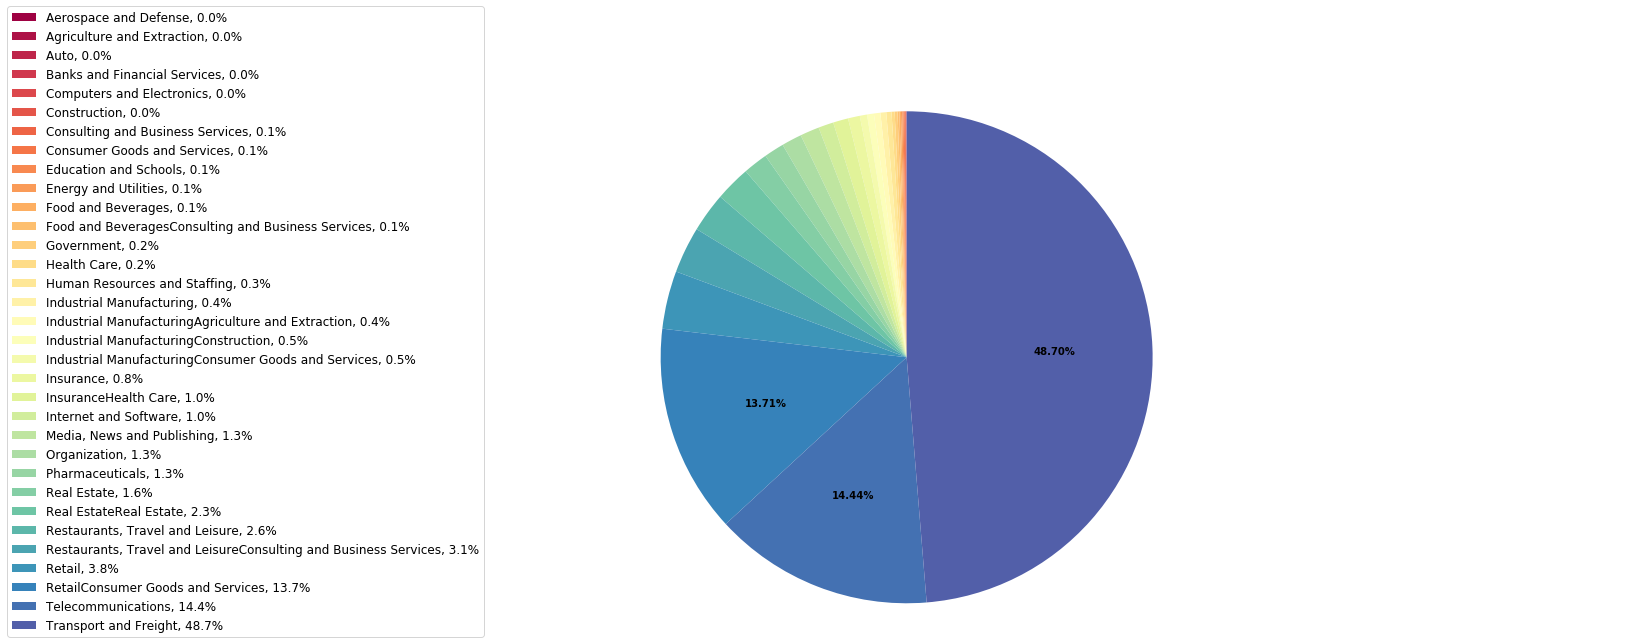

In [402]:
#fig=plt.figure()
#ax=fig.add_subplot()
#ax.scatter(industry['Company_Industry'], industry['No_of_Reviews'], s=industry['perc'])
#plt.show()

var=indeed_industry.groupby(['Company_Industry']).sum().stack()
temp=var.unstack()
type(temp)
x_list=temp['No_of_Reviews']
x_list=sorted(x_list)
label_list=temp.index
#plt.axis('equal')
#plt.pie(x_list, labels=label_list, autopct='%1.1f%%')
#plt.title('Reviews by Industry')
#plt.show()

def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct


#sizes = [15, 30, 45, 10, 10, 24, 13, 18, 28, 20, 13, 15, 5, 1, 18, 10,
#         10, 10]
NUM_COLORS = len(x_list)

fig1, ax1 = plt.subplots(figsize=(20, 10))

# set color theme
# https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib
theme = plt.get_cmap('Spectral')
ax1.set_prop_cycle("color", [theme(1. * i / len(x_list)) for i in range(len(x_list))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    x_list, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(x_list)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(label_list, x_list)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

#fig1.savefig('chart.png')


In [126]:
indeed_state = indeed_data[['Job_Type','CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states']]
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,1
1,data_scientist,0,0,0,1,0,0,0,0,0,0,0
2,data_scientist,0,0,0,0,0,0,0,0,0,0,1
3,data_scientist,0,0,0,0,0,0,0,0,1,0,0
4,data_scientist,0,0,0,1,0,0,0,0,0,0,0


In [117]:
#replace the blank values with Unknows
indeed_state.replace(np.NaN, 'Unknown', inplace=True)
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,1
1,data_scientist,0,0,0,1,0,0,0,0,0,0,0
2,data_scientist,0,0,0,0,0,0,0,0,0,0,1
3,data_scientist,0,0,0,0,0,0,0,0,1,0,0
4,data_scientist,0,0,0,1,0,0,0,0,0,0,0


In [148]:
#Group the dataset by Job Type and State
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states'].sum()


,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_analyst,376,230,85,117,86,66,57,55,48,46,625
1,data_engineer,296,118,72,76,52,68,43,20,24,38,324
2,data_scientist,723,253,177,136,133,106,122,94,68,55,674


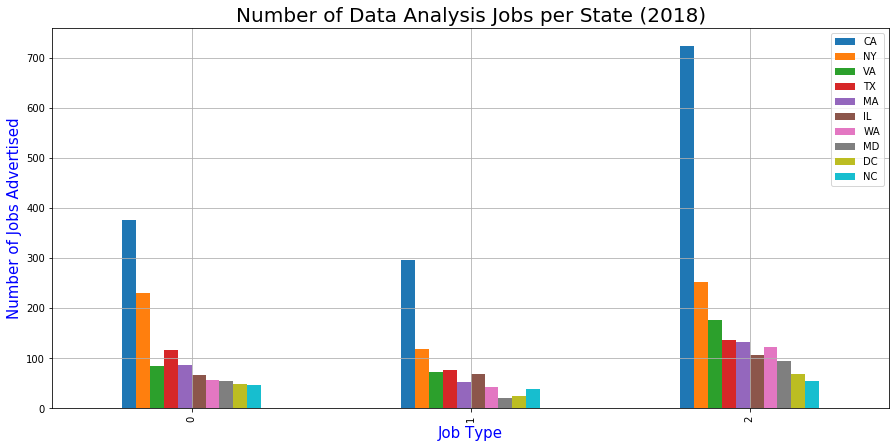

In [150]:
fig, ax = plt.subplots(figsize=(15,7))
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum().plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='Job Type', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
plt.grid()
plt.show()

In [165]:
state_df=indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum()
state_df

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC
0,data_analyst,376,230,85,117,86,66,57,55,48,46
1,data_engineer,296,118,72,76,52,68,43,20,24,38
2,data_scientist,723,253,177,136,133,106,122,94,68,55


In [170]:
#reformat dataframe to add state columns to rows
new_format_df = state_df.melt(id_vars=["Job_Type"], 
        var_name="State", 
        value_name="Value")
new_format_df

,Job_Type,State,Value
0,data_analyst,CA,376
1,data_engineer,CA,296
2,data_scientist,CA,723
3,data_analyst,NY,230
4,data_engineer,NY,118
5,data_scientist,NY,253
6,data_analyst,VA,85
7,data_engineer,VA,72
8,data_scientist,VA,177
9,data_analyst,TX,117


In [172]:
# Group data for all Data Anlysis jobs by state to use in the Choropleth map 
state_group_df=new_format_df.groupby('State', as_index=False)['Value'].sum()
state_group_df   

,State,Value
0,CA,1395
1,DC,140
2,IL,240
3,MA,271
4,MD,169
5,NC,139
6,NY,601
7,TX,329
8,VA,334
9,WA,222


In [176]:

#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
mymap = folium.Map(location=[37, -102], zoom_start=5)
#Add the color for the chloropleth
mymap.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_group_df,
    columns=['State','Value'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(mymap)
mymap